In [1]:
# Import Python Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
import plotly as py
import plotly.graph_objs as go
#filter warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
%ls


drive/  sample_data/


In [4]:
%cd drive

/content/drive


In [5]:
%ls

MyDrive/


In [7]:
%cd MyDrive

/content/drive/MyDrive


In [8]:
%ls

'10 th memo .jpg'
 1540179604580.jpg
 16214068772372557054745757792048.jpg
'56. Energy Efficient Scheduling of Servers.rar'
'940598-MANISHA LOKASANI travel insurance .pdf'
'AADHAAR CARD.jpg'
 Amazon_Unlocked_Mobile.csv
'Assign4&5_WebMDReviews.xlsx'
 Assignment1_denton_housing.csv
 attribute_histogram_plots.png
'bun-sqfq-aix – 29 Apr 2023.gjam'
 certificate.pdf
'cleaned data'
'Colab Notebooks'/
 Contacts.vcf
 data_description.txt
 declaration.jpg
'Document from Princess👸🏻👸🏻.pdf'
'Energy Efficient Scheduling of Servers.mp4'
'Energy Efficient Scheduling of Servers with Multi-Sleep Modes for Cloud Data Center (1) (1).rar'
'Energy Efficient Scheduling of Servers with Multi-Sleep Modes for Cloud Data Center (1).rar'
'Energy Efficient Scheduling of Servers with Multi-Sleep Modes for Cloud Data Center (2).rar'
'Energy Efficient Scheduling of Servers with Multi-Sleep Modes for Cloud Data Center.rar'
'f1 visa.jpg'
'Fest 2020'@
'Getting started.pdf'
 IMG_0308.HEIC
 IMG_0311.HEIC
 IMG_0312.HEIC
 I

In [9]:
mall_data = pd.read_csv('Mall_Customers.csv')
print('There are {} rows and {} columns in our dataset'.format(mall_data.shape[0],mall_data.shape[1]))

There are 200 rows and 5 columns in our dataset


In [10]:
mall_data.head()
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
# We see there are no missing data points
mall_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

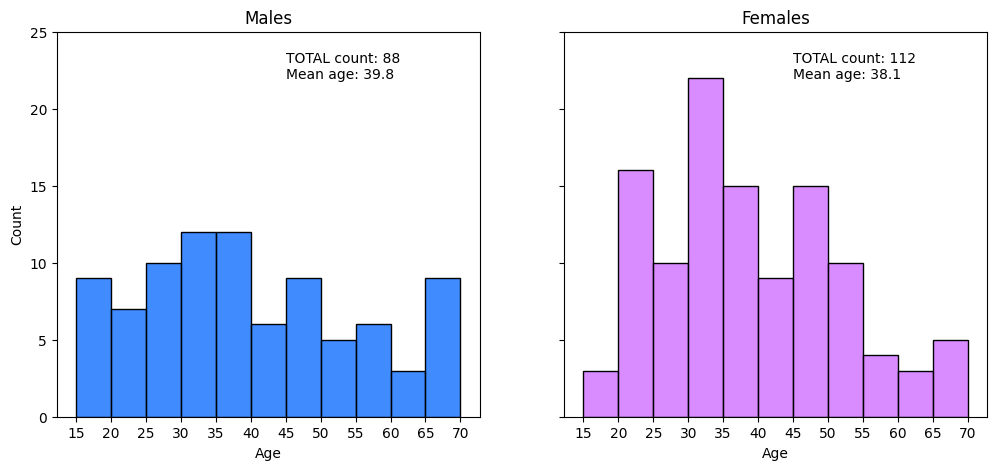

Kolgomorov-Smirnov test p-value:0.49


In [12]:
males_age = mall_data[mall_data['Genre']=='Male']['Age']
# subset with males age
females_age = mall_data[mall_data['Genre']=='Female']['Age']
# subset with females age
age_bins = range(15,75,5)
# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.histplot(males_age,bins=age_bins, color='#0066ff', ax=ax1)
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))
# females histogram
sns.histplot(females_age, bins=age_bins, color='#cc66ff', ax=ax2, )
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))
plt.show()
print('Kolgomorov-Smirnov test p-value:{:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

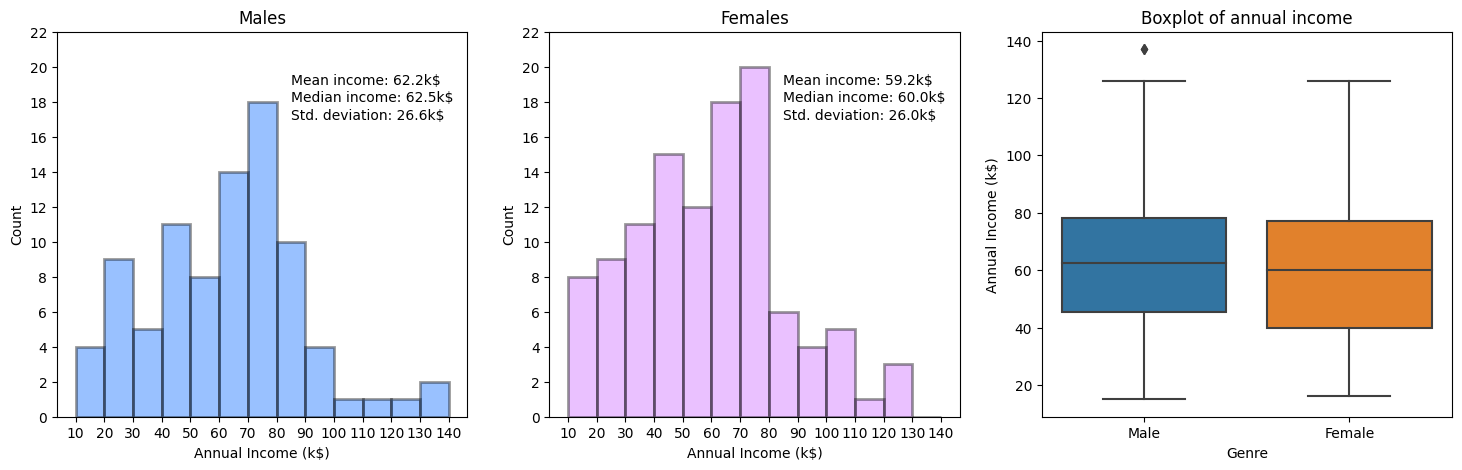

Kolgomorov-Smirnov test p-value:0.78


In [13]:
males_income = mall_data[mall_data['Genre']=='Male']['Annual Income (k$)']
# subset with males income
females_income = mall_data[mall_data['Genre']=='Female']['Annual Income (k$)']
# subset with females income
my_bins = range(10,150,10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1,
hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff',
ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Genre', y='Annual Income (k$)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()
print('Kolgomorov-Smirnov test p-value:{:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

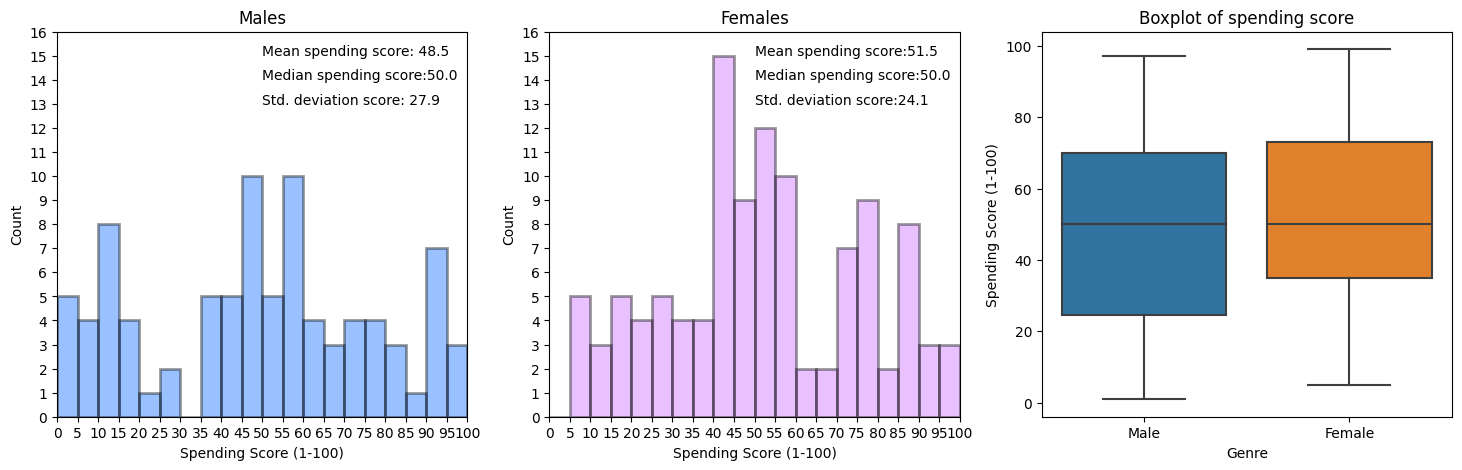

Kolgomorov-Smirnov test p-value:0.29


In [18]:
males_spending = mall_data[mall_data['Genre']=='Male']['Spending Score (1-100)']

# subset with males age
females_spending = mall_data[mall_data['Genre']=='Female']['Spending Score (1-100)']

# subset with females age
spending_bins = range(0,105,5)
# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff',
ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score:{:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# females histogram
sns.distplot(females_spending, bins=spending_bins, kde=False,
color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score:{:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score:{:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score:{:.1f}".format(females_spending.std()))

# boxplot
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()
print('Kolgomorov-Smirnov test p-value:{:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))

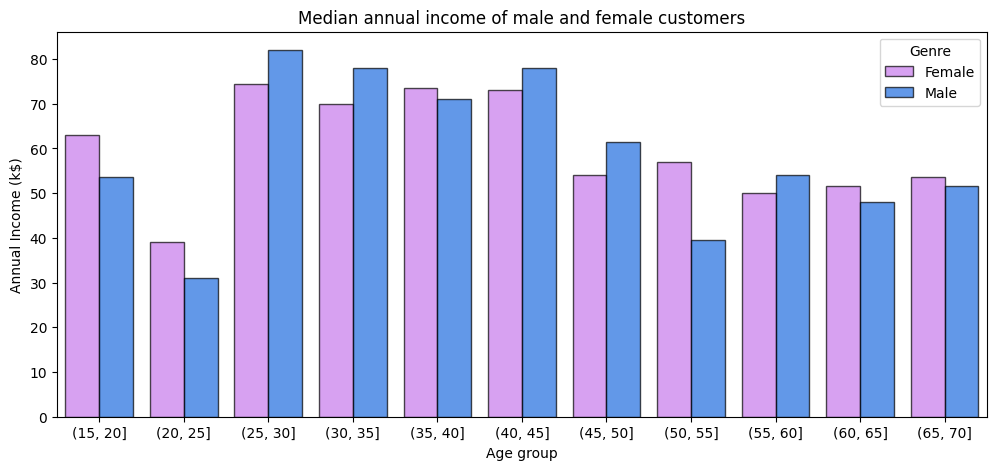

In [19]:
medians_by_age_group = mall_data.groupby(["Genre",pd.cut(mall_data['Age'],
age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Genre',
'Age_group'])
medians_by_age_group.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Genre',
data=medians_by_age_group, palette=['#cc66ff','#0066ff'],
alpha=0.7,edgecolor='k',ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

In [22]:
from scipy.stats import pearsonr


In [23]:
# calculating Pearson's correlation
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

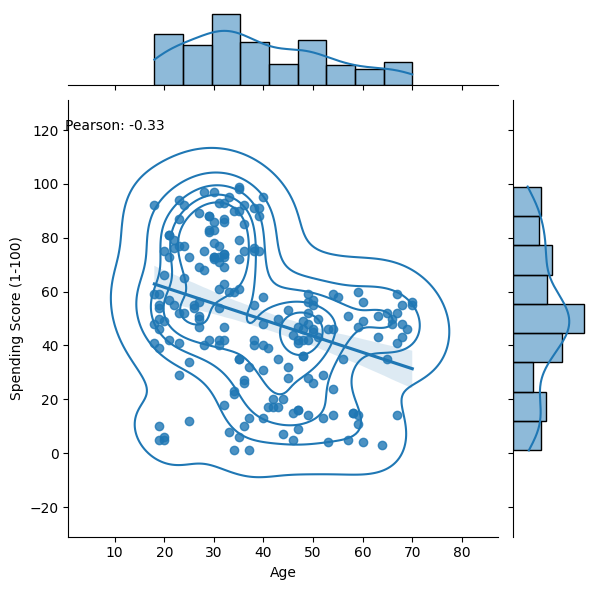

In [24]:
jp = sns.jointplot(x='Age', y='Spending Score (1-100)', data=mall_data,
 kind='reg').plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.text(0, 120, 'Pearson: {:.2f}'.format(corr))
plt.show()

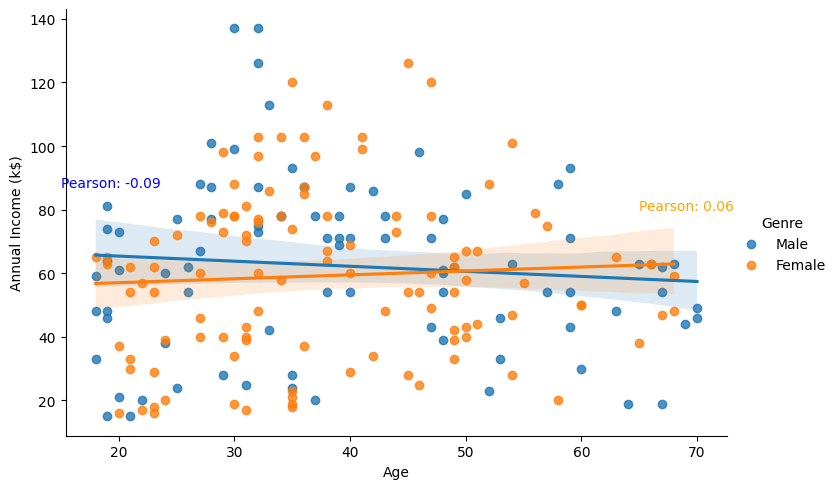

In [25]:
# Calculating Pearson's Correlation
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)
sns.lmplot(x='Age', y='Annual Income (k$)', data=mall_data, hue='Genre',aspect=1.5)
plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')
plt.show()

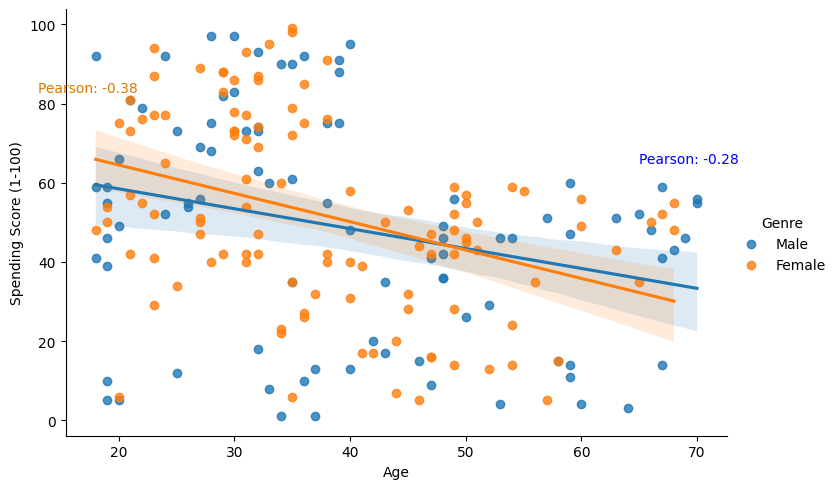

In [26]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)
sns.lmplot(x='Age', y='Spending Score (1-100)', data=mall_data, hue='Genre',
aspect=1.5)
plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')
plt.show()

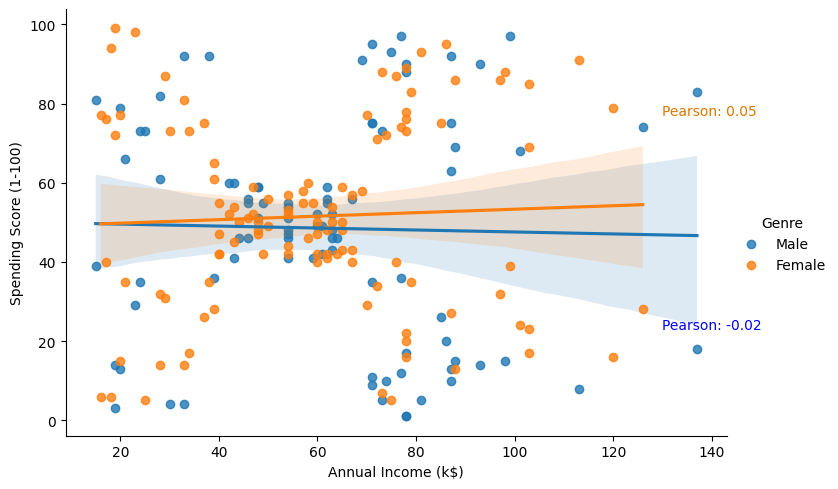

In [28]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_data,
hue='Genre', aspect=1.5)
plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')
plt.show()

In [31]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
# subset with numeric variables only

In [32]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores
for n in n_clusters:
 KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
 clusters_inertia.append(KM_est.inertia_) # data for the elbow method
 silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
 s_scores.append(silhouette_avg) # data for the silhouette score method

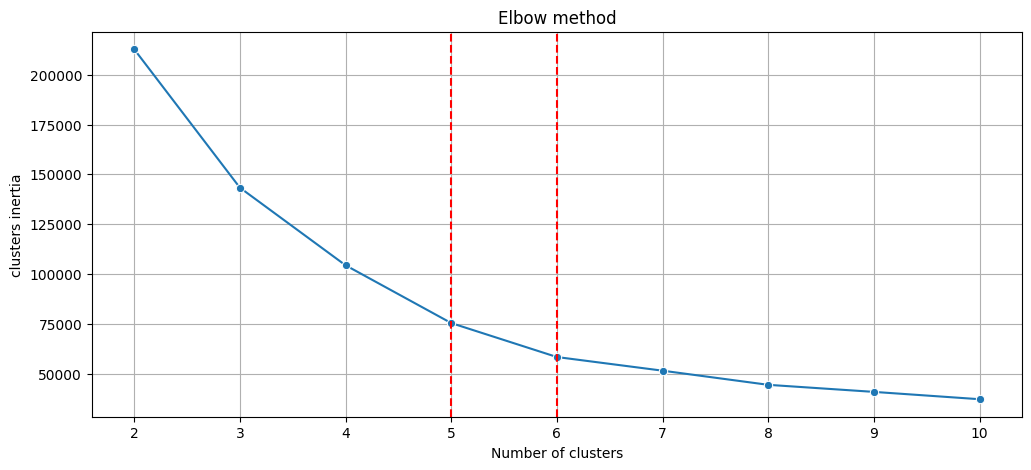

In [33]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.lineplot(x=n_clusters, y=clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

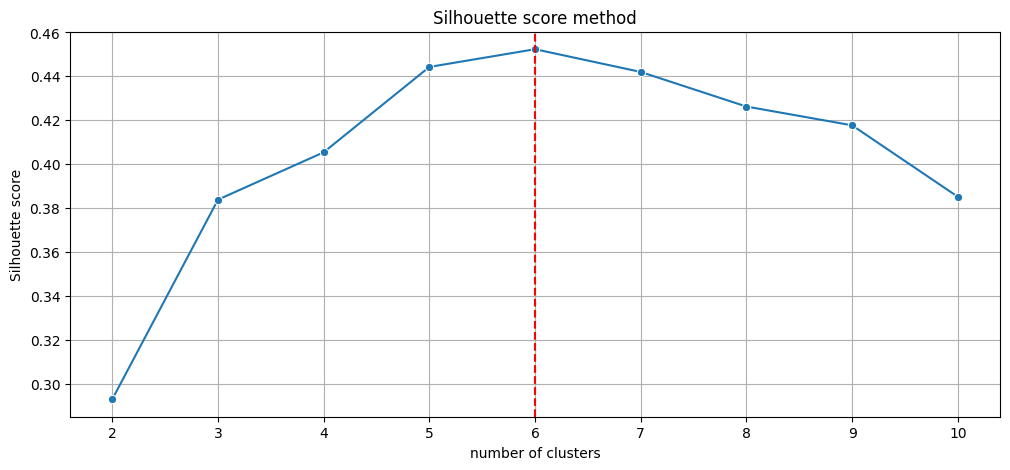

In [34]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

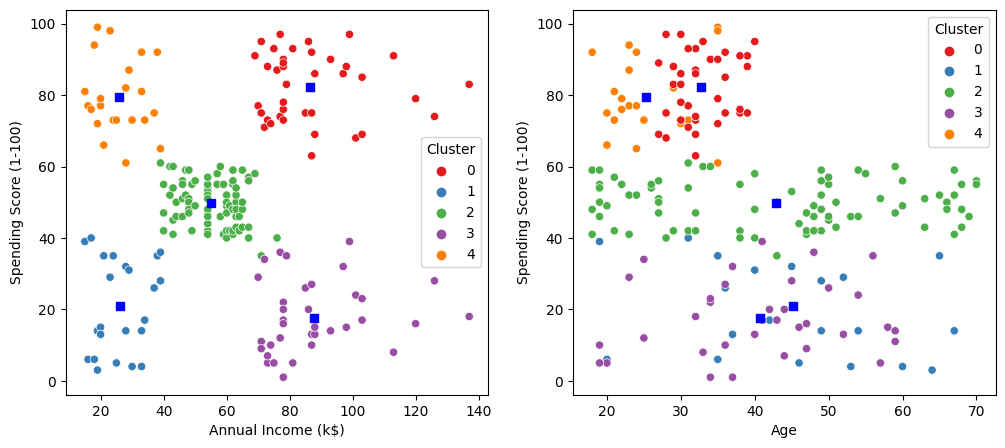

In [45]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics)
# initialize and fit K-Means model
KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_
# append labels to points
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))
scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
data=KM5_clustered,hue='Cluster', ax=axes[0], palette='Set1', legend='full')
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered,
hue='Cluster', palette='Set1', ax=axes[1], legend='full')
axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()


In [46]:
# Size of clusters
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,39
1,23
2,80
3,36
4,22


In [81]:
# Create an interactive 3D view of K-Means with 5 clusters with Plotly
def tracer(db, n, name):
 '''
 This function returns trace object for Plotly
 '''
 return go.Scatter3d(
 x = db[db['Cluster']==n]['Age'],
 y = db[db['Cluster']==n]['Annual Income (k$)'],
 z = db[db['Cluster']==n]['Spending Score (1-100)'],
 mode = 'markers',
 name = name,
 marker = dict(
 size = 4
 )
 )
trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')
data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
 title = 'Clusters by K-Means',
 scene = dict(
 xaxis = dict(title = 'Age'),
 yaxis = dict(title = 'Annual Income'),
 zaxis = dict(title = 'Spending Score')
 )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


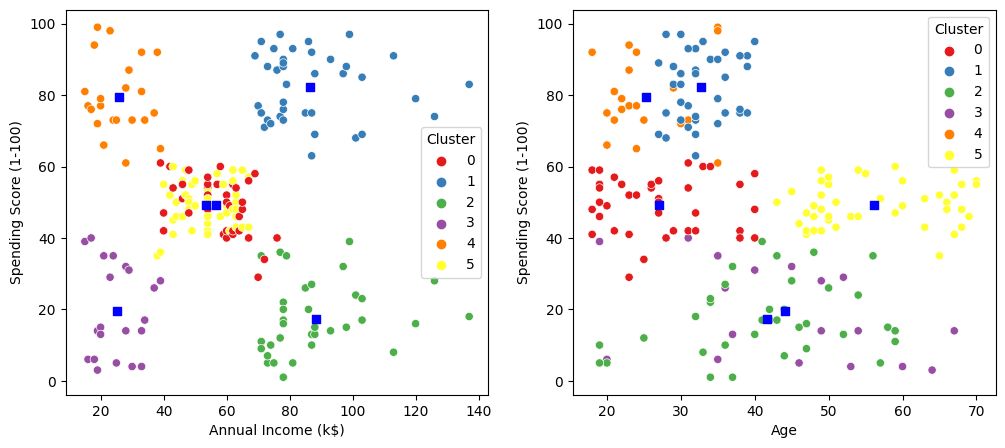

In [53]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) #
#initialize and fit K-Means model
KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_
# append labels to points
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
data=KM6_clustered,hue='Cluster', ax=axes[0], palette='Set1', legend='full')
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM6_clustered,
hue='Cluster', palette='Set1', ax=axes[1], legend='full')
# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1],
KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0],
KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [54]:
# Size of Clusters
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,38
1,39
2,35
3,21
4,22
5,45


In [55]:
# Create an interactive 3D view of K-Means with 6 clusters with Plotly
def tracer(db, n, name):
 '''
 This function returns trace object for Plotly
 '''
 return go.Scatter3d(
 x = db[db['Cluster']==n]['Age'],
 y = db[db['Cluster']==n]['Spending Score (1-100)'],
 z = db[db['Cluster']==n]['Annual Income (k$)'],
 mode = 'markers',
 name = name,
 marker = dict(
 size = 5
 )
 )
trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
 title = 'Clusters by K-Means',
 scene = dict(
 xaxis = dict(title = 'Age'),
 yaxis = dict(title = 'Spending Score'),
 zaxis = dict(title = 'Annual Income')
 )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [56]:
# create a matrix of investigated combinations.
eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [57]:
# collecting number of generated clusters
no_of_clusters = []
sil_score = []
for p in DBSCAN_params:
 DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
 no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
 sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

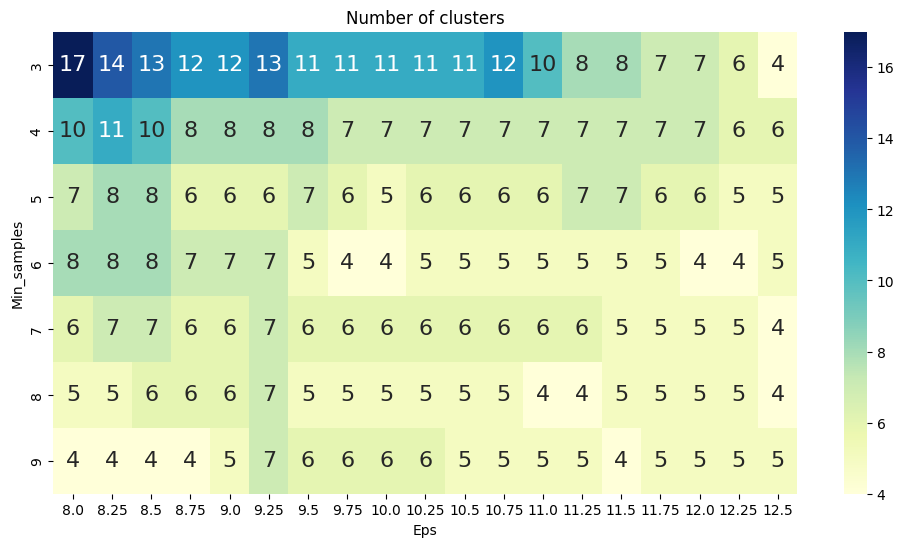

In [59]:
# The heatplot illustrates how many clusters were generated by the algorithm with the respective parameters combinations
#created above. You can see there are clusters from 17 to 4.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples',
columns='Eps')
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

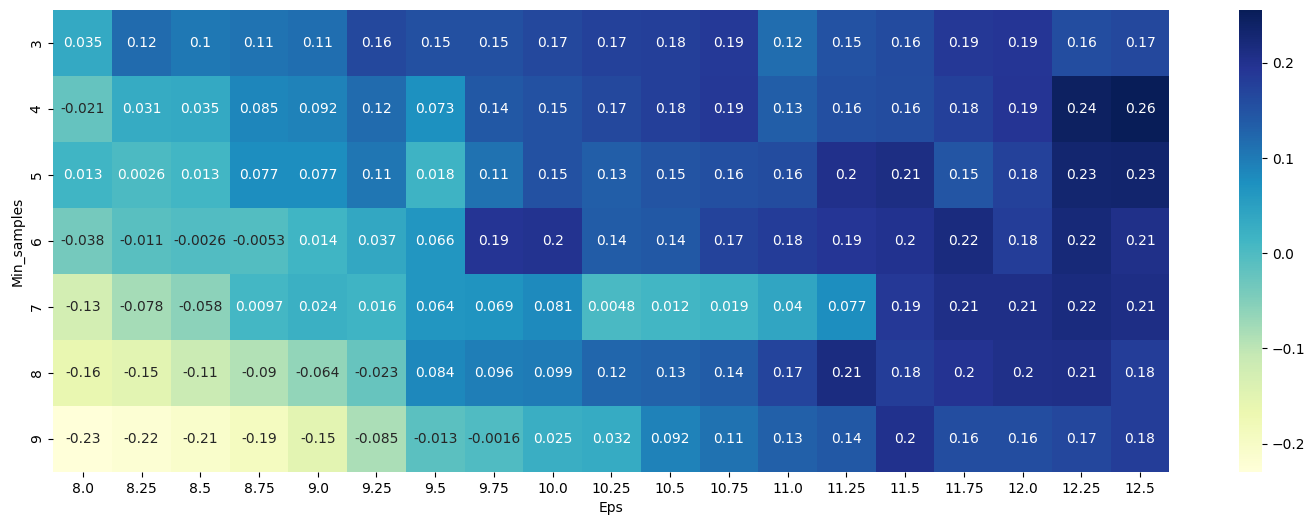

In [60]:
# In the heatmap below, we see the Global maximum is 0.26 for eps=12.5 and
min_samples=4.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples',
columns='Eps')
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu",
ax=ax)
plt.show()


In [62]:
# Based on the graph above let's use the Global maximum settings (eps = 12.5and min_samples = 4)
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)
DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_
# append labels to points

In [63]:
# With the following code, you will see that 5 clusters are created AND one outlier cluster (-1) was created.
# You can also see that the size of clusters varies greatly, and some only have a few observations.
# Lastly, you see there are 18 outliers (-1).
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


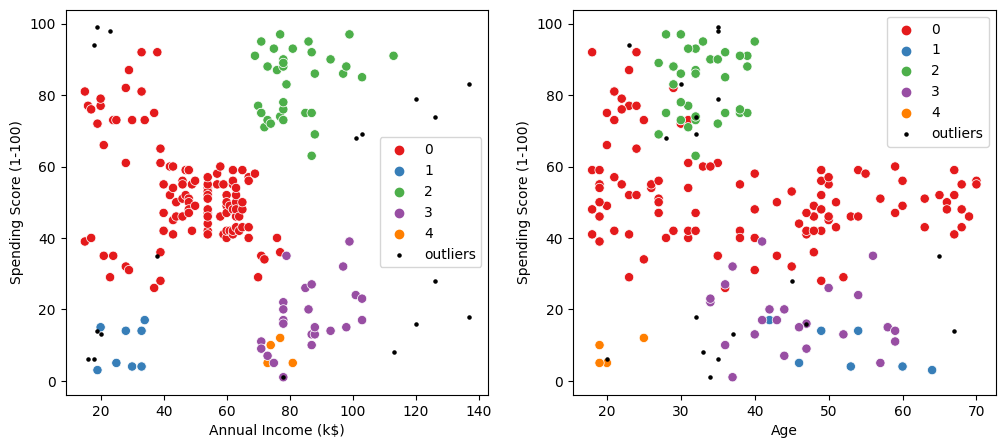

In [66]:

# With this code, you will see that there are some outliers (small black dots).
#These points do not meet distance and minimum samples requirements to be recognized as a cluster.
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
 data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
 hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)
sns.scatterplot(x='Age', y='Spending Score (1-100)',
 data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
 hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'],
s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5,
label='outliers', c="k")
axes[0].legend()
axes[1].legend()
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')
plt.show()

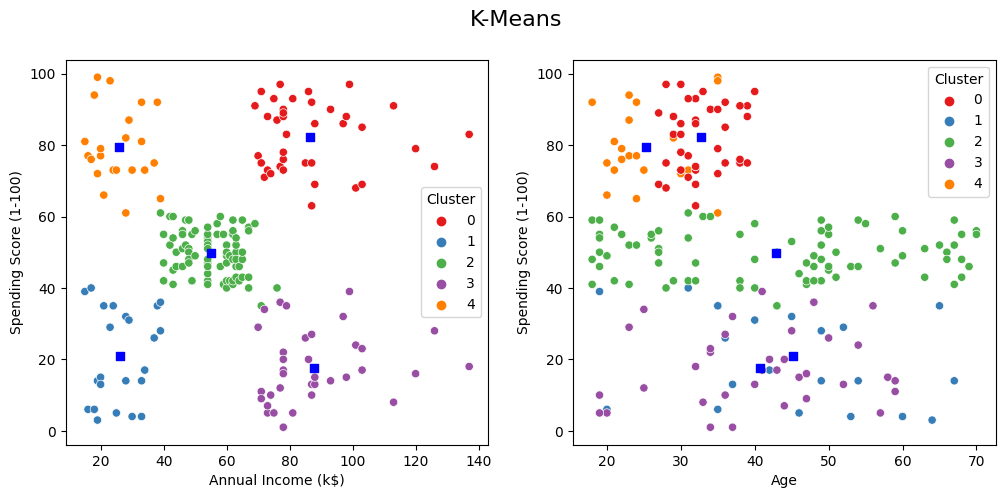

In [67]:
# K-Means with K=5
fig1.suptitle('K-Means', fontsize=16)
fig1

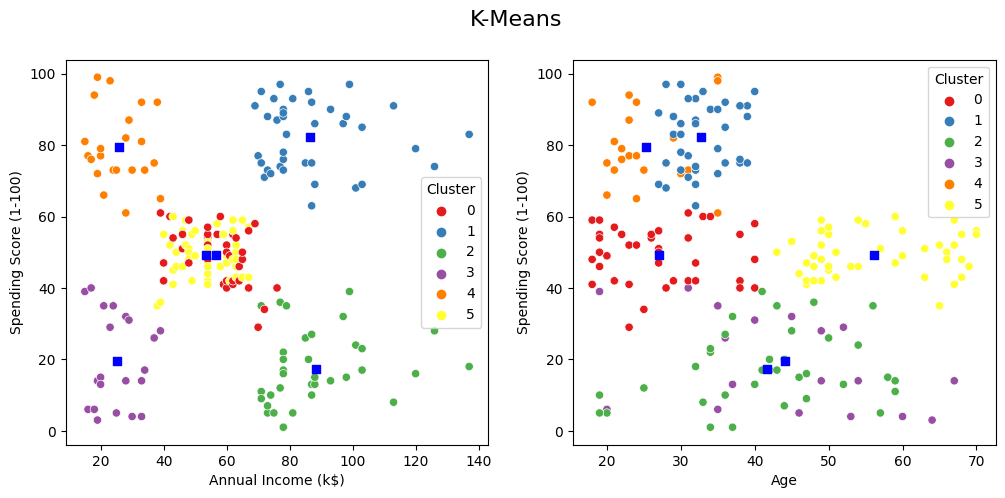

In [68]:
# K-Means with K=6
fig11.suptitle('K-Means', fontsize=16)
fig11

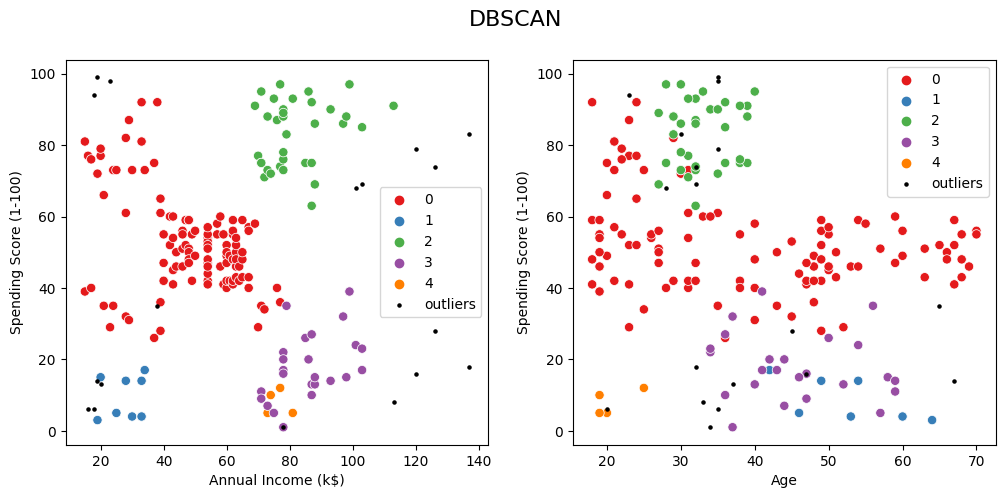

In [69]:
# DBSCAN with 5 clusters AND outliers
fig2.suptitle('DBSCAN', fontsize=16)
fig2

In [70]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes],axis=1,
sort=False)
clusters

,KM_size,DBSCAN_size
Cluster,,
0,38.0,112.0
1,39.0,8.0
2,35.0,34.0
3,21.0,24.0
4,22.0,4.0
5,45.0,NaN
-1,NaN,18.0
